In [341]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import h5py

from shapely.geometry import Polygon
import contextily as ctx

from ast import literal_eval
import random

from modules.data_aggregation.satellite_data import create_gdf, export_gdf, import_gdf_from_shp

from modules.data_aggregation.params import CITY_BOUNDING_BOXES
from modules.ml_logic.utils import slice_picture_coords, get_sub_tile, get_all_sub_coords, get_corners

# Importing processed satellite data

In [2]:
# import GeoDataFrame
gdf_Paris_import = import_gdf_from_shp("Paris")

In [3]:
gdf_Paris_import

,LST,ele,LST_diff,ele_diff,ul_corner,ll_corner,lr_corner,ur_corner,bb,geometry
0,28.489990,45.577309,-2.315979,-28.184334,"[[2.2633263464873545, 48.81321032181281]]","[[2.2633263464873545, 48.813839888049166]]","[[2.2639559127237074, 48.813839888049166]]","[[2.2639559127237074, 48.81321032181281]]","[[2.2633263464873545, 48.81321032181281], [2.2...","POLYGON ((2.26333 48.81321, 2.26333 48.81384, ..."
1,28.549988,45.577431,-2.255981,-28.184212,"[[2.2639559127237074, 48.81321032181281]]","[[2.2639559127237074, 48.813839888049166]]","[[2.2645854789600603, 48.813839888049166]]","[[2.2645854789600603, 48.81321032181281]]","[[2.2639559127237074, 48.81321032181281], [2.2...","POLYGON ((2.26396 48.81321, 2.26396 48.81384, ..."
2,28.450012,46.947140,-2.355957,-26.814503,"[[2.2645854789600603, 48.81321032181281]]","[[2.2645854789600603, 48.813839888049166]]","[[2.2652150451964133, 48.813839888049166]]","[[2.2652150451964133, 48.81321032181281]]","[[2.2645854789600603, 48.81321032181281], [2.2...","POLYGON ((2.26459 48.81321, 2.26459 48.81384, ..."
3,29.230011,48.411678,-1.575958,-25.349964,"[[2.2652150451964133, 48.81321032181281]]","[[2.2652150451964133, 48.813839888049166]]","[[2.265844611432766, 48.813839888049166]]","[[2.265844611432766, 48.81321032181281]]","[[2.2652150451964133, 48.81321032181281], [2.2...","POLYGON ((2.26522 48.81321, 2.26522 48.81384, ..."
4,27.889984,48.643574,-2.915985,-25.118069,"[[2.265844611432766, 48.81321032181281]]","[[2.265844611432766, 48.813839888049166]]","[[2.266474177669119, 48.813839888049166]]","[[2.266474177669119, 48.81321032181281]]","[[2.265844611432766, 48.81321032181281], [2.26...","POLYGON ((2.26584 48.81321, 2.26584 48.81384, ..."
...,...,...,...,...,...,...,...,...,...,...
35023,34.149994,67.602211,3.344025,-6.159431,"[[2.4188292068665307, 48.90009046242952]]","[[2.4188292068665307, 48.90072002866587]]","[[2.4194587731028836, 48.90072002866587]]","[[2.4194587731028836, 48.90009046242952]]","[[2.4188292068665307, 48.90009046242952], [2.4...","POLYGON ((2.41883 48.90009, 2.41883 48.90072, ..."
35024,33.750000,68.582405,2.944031,-5.179237,"[[2.4194587731028836, 48.90009046242952]]","[[2.4194587731028836, 48.90072002866587]]","[[2.4200883393392365, 48.90072002866587]]","[[2.4200883393392365, 48.90009046242952]]","[[2.4194587731028836, 48.90009046242952], [2.4...","POLYGON ((2.41946 48.90009, 2.41946 48.90072, ..."
35025,33.750000,68.582405,2.944031,-5.179237,"[[2.4200883393392365, 48.90009046242952]]","[[2.4200883393392365, 48.90072002866587]]","[[2.4207179055755894, 48.90072002866587]]","[[2.4207179055755894, 48.90009046242952]]","[[2.4200883393392365, 48.90009046242952], [2.4...","POLYGON ((2.42009 48.90009, 2.42009 48.90072, ..."
35026,32.690002,70.776123,1.884033,-2.985519,"[[2.4207179055755894, 48.90009046242952]]","[[2.4207179055755894, 48.90072002866587]]","[[2.4213474718119423, 48.90072002866587]]","[[2.4213474718119423, 48.90009046242952]]","[[2.4207179055755894, 48.90009046242952], [2.4...","POLYGON ((2.42072 48.90009, 2.42072 48.90072, ..."


In [4]:
# import DataFrame
df_Paris_import = pd.read_csv('../../data/processed_data/Paris/Paris.csv')

In [5]:
df_Paris_import.bb.apply(literal_eval)[23289]

[[2.3294308013044134, 48.87113041555728],
 [2.3294308013044134, 48.87175998179364],
 [2.3300603675407663, 48.87175998179364],
 [2.3300603675407663, 48.87113041555728]]

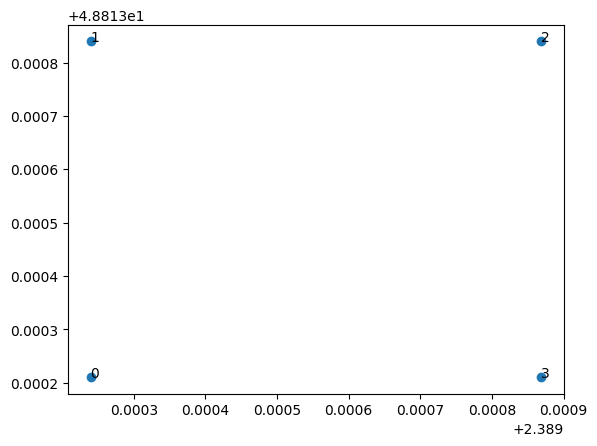

In [6]:
first_pixel = df_Paris_import.bb.apply(literal_eval)[200]
fig, ax = plt.subplots()

ax.scatter(np.array(first_pixel)[:,0], np.array(first_pixel)[:,1])

for i in range(4):
    ax.annotate(i, first_pixel[i])

In [7]:
# basic info

print(f"mean temp: {gdf_Paris_import.LST.mean()}, mean elevation: {gdf_Paris_import.ele.mean()}")
print(f"mean diff temp: {gdf_Paris_import.LST_diff.mean()}, mean diff elevation: {gdf_Paris_import.ele_diff.mean()}")
print(f"min temp: {gdf_Paris_import.LST.min()}, min elevation: {gdf_Paris_import.ele.min()}")
print(f"max temp: {gdf_Paris_import.LST.max()}, max elevation: {gdf_Paris_import.ele.max()}")
print(f"min diff temp: {gdf_Paris_import.LST_diff.min()}, min diff elevation: {gdf_Paris_import.ele_diff.min()}")
print(f"max diff temp: {gdf_Paris_import.LST_diff.max()}, max diff elevation: {gdf_Paris_import.ele_diff.max()}")


mean temp: 30.805967938400396, mean elevation: 73.76163836038451
mean diff temp: -1.2998808542451752e-06, mean diff elevation: -4.095670171452124e-06
min temp: 19.07000732421875, min elevation: 45.577308654785156
max temp: 41.329986572265625, max elevation: 135.3814697265625
min diff temp: -11.7359619140625, min diff elevation: -28.18433380126953
max diff temp: 10.524017333984375, max diff elevation: 61.61982727050781


# Importing raw satellite data 
has to be downloaded in '../../data/raw_data/{city_name}/*.h5'

In [172]:
# two different L2 files containing LST
lst_raw = h5py.File('../../data/raw_data/Paris/ECOSTRESS_L2_LSTE_23097_002_20220802T145219_0601_02.h5', 'r')

# L1 fille containing GPS coordinates
geo_raw = h5py.File('../../data/raw_data/Paris/ECOSTRESS_L1B_GEO_23097_002_20220802T145219_0601_01.h5', 'r')

In [173]:
lst_raw_array = np.array(lst_raw['SDS']['LST'], dtype = np.float32)
lst_raw_array.shape

(5632, 5400)

In [178]:
np.vstack((lst_raw_array, lst_raw_array)).shape

(11264, 5400)

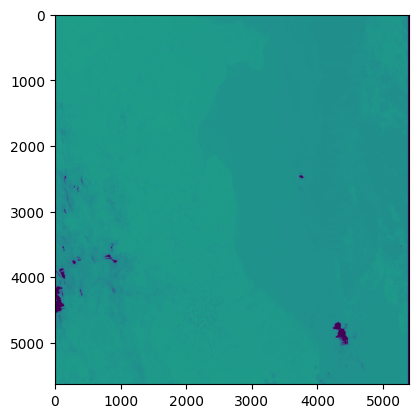

In [174]:
plt.imshow(lst_raw_array)

# Creating processed data
(if raw data availabe)

In [ ]:
# create GeoDataFrame
gdf_Paris = create_gdf("Paris")

KeyboardInterrupt: 

In [ ]:
gdf_Paris[1]['bb'][0]

[[2.2633263464873545, 48.81321032181281],
 [2.2633263464873545, 48.813839888049166],
 [2.2639559127237074, 48.813839888049166],
 [2.2639559127237074, 48.81321032181281]]

In [ ]:
gdf_Paris[1]['bb'][0]

[[2.2639559127237074, 48.81321032181281],
 [2.2639559127237074, 48.813839888049166],
 [2.2633263464873545, 48.813839888049166],
 [2.2633263464873545, 48.81321032181281]]

In [ ]:
# create & export GeoDataFrame
export_gdf("Paris")

# Plotting

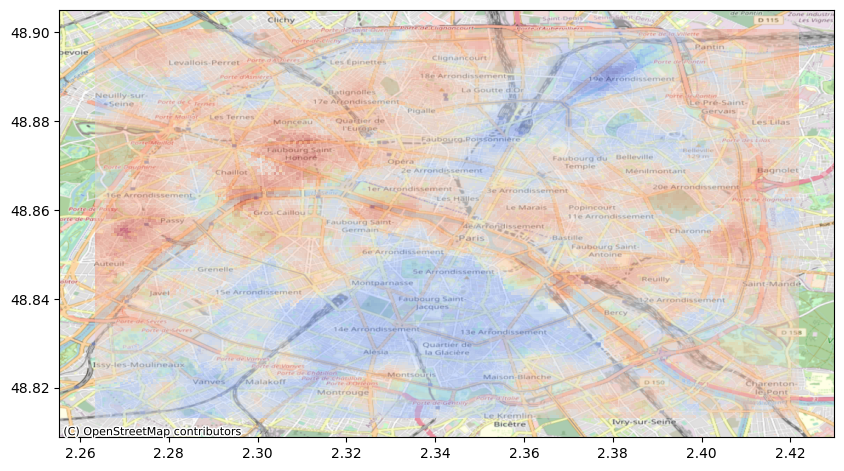

In [1005]:
fig, ax = plt.subplots(figsize = (10,15))
gdf_Paris_import.plot(column = 'LST', ax = ax, alpha = .5, cmap = 'coolwarm')
ctx.add_basemap(ax,  crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

# Slicing of image

In [268]:
def get_split_indices(data_array: np.array, number_features: int):
    """
    returns index where array has to be split
    """
    return len(data_array)/number_features

int(get_split_indices(subtiles_array_0.values[0], number_features))

4

In [269]:
def split_array(data_array: np.array, split_index:int):
    """
    returns split array
    """
    return [data_array[i:i+split_index] for i in range(0,len(data_array), split_index)]

In [532]:
import os

# processed data
INPUT_PATH = os.path.join('..','..','data','processed_data')

In [615]:
def get_sub_tiles(data: pd.DataFrame, num_px_lon: int, num_px_lat:int):
    
    # reduce size of df
    if 'geometry' in data.columns: 
        df_red = data.drop(columns=['LST', 'ele','ll_corner', 'ur_corner', 'lr_corner','bb', 'geometry'])
    else: 
        df_red = data.drop(columns=['LST', 'ele','ll_corner', 'ur_corner', 'lr_corner','bb'])

    # convert str to list
    df_red['ul_corner'] = df_red.ul_corner.apply(literal_eval)
    
    # separate into lat and lon
    df_red['lon'] = np.array([row[0] for row in df_red.ul_corner])[:,0]
    df_red['lat'] = np.array([row[0] for row in df_red.ul_corner])[:,1]
    
    # set lon, lat as index and unstack 
    data_coord_array = df_red.set_index(['lon', 'lat']).unstack().sort_index()
    data_array = data_coord_array.drop(columns = 'ul_corner').values
    coord_array = data_coord_array['ul_corner'].values

    # split data array
    number_features = len(df_red.columns)-3 # minus lat, lon, ul_corner
    split_index_data = int(get_split_indices(data_array[0], number_features))
    
    # transform data_array
    data_array_trans = np.array([np.array(split_array(array, split_index_data)).T for array in data_array])
    
    # split coords array
    split_index_coord = int(get_split_indices(coord_array[0], 1))
    
    # transform coord_array
    coord_array_trans = np.array([np.array(split_array(array, split_index_coord)).T for array in coord_array])
    
    lon_dim, lat_dim = data_array_trans.shape[:2]
    
    lon_range = range(0, lon_dim - num_px_lon, num_px_lon)
    lat_range = range(0, lat_dim - num_px_lat, num_px_lat)

    # divide data and coords into subtiles
    data_tiles = np.array([data_array_trans[i:i+num_px_lon, j:j+num_px_lat, :] for i in lon_range for j in lat_range])
    coord_tiles = np.array([coord_array_trans[i:i+num_px_lon, j:j+num_px_lat, :] for i in lon_range for j in lat_range])
    
    # print(coord_tiles[0])
    
    # select just the coord tiles boundaries
    coord_bb = np.array([[[coords[j,0,0][0][0], coords[j,0,-1][0][0]], [coords[j,0,0][0][1], coords[j,0,-1][0][1]]] for coords in coord_tiles\
                            for j in range(coord_tiles.shape[1])])
    
    
    return data_tiles, coord_tiles, coord_bb

In [555]:
def tile_whole_city(city:str, num_px_lon: int = 32, num_px_lat: int = 32):

    # import csv data
    data_in_path = os.path.join(INPUT_PATH, city, f'{city}.csv')
    print(data_in_path)

    data = pd.read_csv(data_in_path)
    data_tiles, coord_bb = get_sub_tiles(data, num_px_lon, num_px_lat)
    print(data_tiles.shape)

    # export both data and coords bounding boxes
    data_ex_path = os.path.join(INPUT_PATH, city, f'{city}_data_tiles_{num_px_lon}_{num_px_lat}.npy')
    coords_ex_path = os.path.join(INPUT_PATH, city, f'{city}_coordbb_tiles_{num_px_lon}_{num_px_lat}.npy')

    np.save(data_ex_path, data_tiles)
    np.save(coords_ex_path, coord_bb)

    return data_tiles, coord_bb

In [617]:
coord_tiles = get_sub_tiles(gdf_Paris_import, 32, 32)[1]

In [906]:
lr_corner = np.array([corner for corner in df_Paris_import['lr_corner'].apply(literal_eval)])
ul_corner = np.array([corner for corner in df_Paris_import['ul_corner'].apply(literal_eval)])

#one point
corner_diff_lon, corner_diff_lat = (lr_corner-ul_corner)[0,0,0], (lr_corner-ul_corner)[0,0,1]
corner_diffs = [[corner_diff_lon/2, 0], [0,0], [0, corner_diff_lat/2], [corner_diff_lon/2, corner_diff_lat/2]]

# sub_corners = [[ul_corner[i].tolist()[0], (ul_corner + corner_diff/2)[i].tolist()[0], lr_corner[i].tolist()[0]] for i in range(ul_corner.shape[0])]
corner_diff_lon, corner_diff_lat 

(0.0006295662363529075, 0.0006295662363555721)

In [936]:
(lr_corner-ul_corner)[:,0,1][0]

0.0006295662363555721

In [977]:
def get_subpoints_one(point: list, lon_lat_dist: list, scaling_factor: int = 2):
    """
    returns point, divided by scaling_factor
    """
    diff_lon, diff_lat = lon_lat_dist
    #one point
    corner_diffs = [[[diff_lon/scaling_factor, 0], [0,0], [0, diff_lat/scaling_factor], [diff_lon/scaling_factor, diff_lat/scaling_factor]], # first four subpoints
                    [[diff_lon, 0], [diff_lon/scaling_factor,0], [diff_lon/scaling_factor, diff_lat/scaling_factor], [diff_lon, diff_lat/scaling_factor]], # second
                    [[0,diff_lat/scaling_factor], [0, diff_lat], [diff_lon/scaling_factor, diff_lat], [diff_lon/scaling_factor, diff_lat/scaling_factor]], # 3rd
                    [[diff_lon, diff_lat/scaling_factor], [diff_lon/scaling_factor,diff_lat/scaling_factor], [diff_lon/scaling_factor, diff_lat], [diff_lon, diff_lat]]] # 4th

    sub_points = point + corner_diffs
    
    return sub_points

In [978]:
get_subpoints_one(ul_corner[0,0], [corner_diff_lon, corner_diff_lat])

array([[[ 2.26364113, 48.81321032],
        [ 2.26332635, 48.81321032],
        [ 2.26332635, 48.8135251 ],
        [ 2.26364113, 48.8135251 ]],

       [[ 2.26395591, 48.81321032],
        [ 2.26364113, 48.81321032],
        [ 2.26364113, 48.8135251 ],
        [ 2.26395591, 48.8135251 ]],

       [[ 2.26332635, 48.8135251 ],
        [ 2.26332635, 48.81383989],
        [ 2.26364113, 48.81383989],
        [ 2.26364113, 48.8135251 ]],

       [[ 2.26395591, 48.8135251 ],
        [ 2.26364113, 48.8135251 ],
        [ 2.26364113, 48.81383989],
        [ 2.26395591, 48.81383989]]])

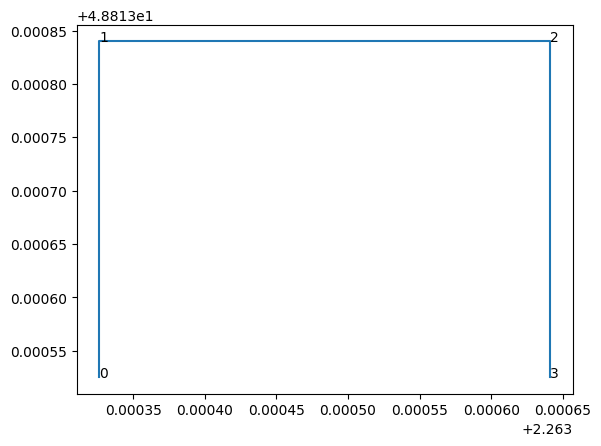

In [961]:
fig, ax = plt.subplots()

sub_points = get_subpoints_one(ul_corner[0,0], [corner_diff_lon, corner_diff_lat])[2]

x = sub_points[:,0]
y = sub_points[:,1]

ax.plot(x, y)

for i in range(4):
    ax.annotate(i, [x[i],y[i]])

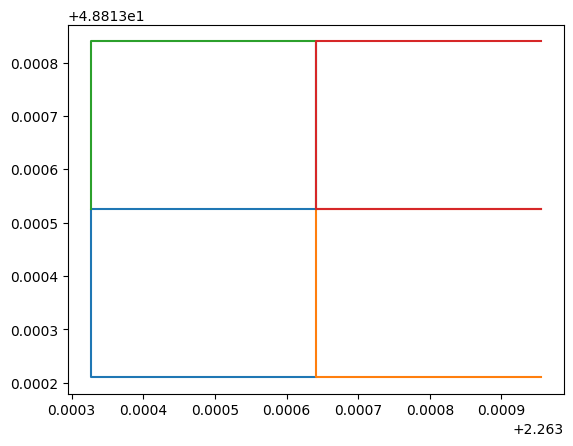

In [962]:
fig, ax = plt.subplots()

for i in range(4):
    sub_points =  get_subpoints_one(ul_corner[0,0], [corner_diff_lon, corner_diff_lat])[i]

    x = sub_points[:,0]
    y = sub_points[:,1]
    ax.plot(x, y)
    
    

In [963]:
def get_all_subpoints(data: pd.DataFrame):
    """
    returns all points divided by four
    """
    # ul, lr corners
    lr_corner = np.array([corner for corner in data['lr_corner'].apply(literal_eval)])
    ul_corner = np.array([corner for corner in data['ul_corner'].apply(literal_eval)])

    # difference between points
    corner_diff_lon_lat = np.array([(lr_corner-ul_corner)[:,0,0], (lr_corner-ul_corner)[:,0,1]]).T

    all_points = [get_subpoints_one(ul_corner[i],corner_diff_lon_lat[i]) for i in range(len(ul_corner))]

    return np.array(all_points).reshape(np.multiply(*np.array(all_points).shape[:2]),4,2)

In [ ]:
def subpixels_city(city:str):
    """
    saves subpixels of city to disk
    """
    
    
    subpixels = get_all_subpoints(data)

In [969]:
get_all_subpoints(df_Paris_import)

[array([[[ 2.26364113, 48.81321032],
         [ 2.26332635, 48.81321032],
         [ 2.26332635, 48.8135251 ],
         [ 2.26364113, 48.8135251 ]],
 
        [[ 2.26395591, 48.81321032],
         [ 2.26364113, 48.81321032],
         [ 2.26364113, 48.8135251 ],
         [ 2.26395591, 48.8135251 ]],
 
        [[ 2.26332635, 48.8135251 ],
         [ 2.26332635, 48.81383989],
         [ 2.26364113, 48.81383989],
         [ 2.26364113, 48.8135251 ]],
 
        [[ 2.26395591, 48.8135251 ],
         [ 2.26364113, 48.8135251 ],
         [ 2.26364113, 48.81383989],
         [ 2.26395591, 48.81383989]]]),
 array([[[ 2.2642707 , 48.81321032],
         [ 2.26395591, 48.81321032],
         [ 2.26395591, 48.8135251 ],
         [ 2.2642707 , 48.8135251 ]],
 
        [[ 2.26458548, 48.81321032],
         [ 2.2642707 , 48.81321032],
         [ 2.2642707 , 48.8135251 ],
         [ 2.26458548, 48.8135251 ]],
 
        [[ 2.26395591, 48.8135251 ],
         [ 2.26395591, 48.81383989],
         [ 2.2642707

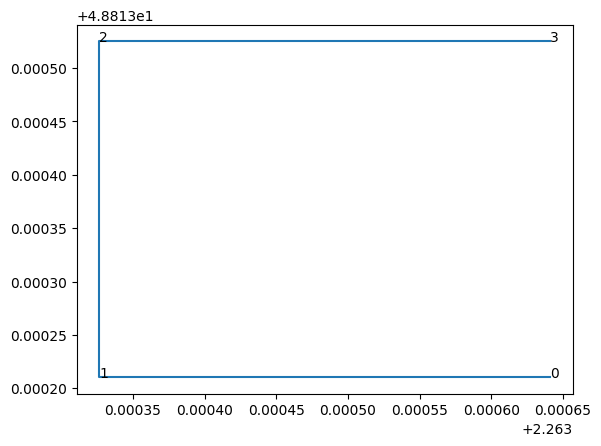

In [965]:
fig, ax = plt.subplots()

sub_points = get_all_subpoints(df_Paris_import)[0][0]

x = sub_points[:,0]
y = sub_points[:,1]

ax.plot(x, y)

for i in range(4):
    ax.annotate(i, [x[i],y[i]])

In [981]:
sub_points_full.shape

(140112, 4, 2)

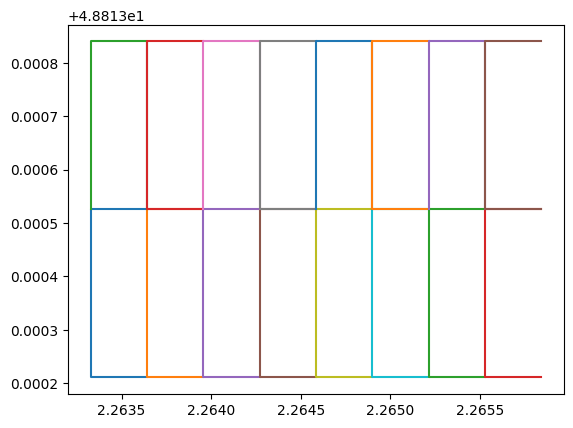

In [985]:
from modules.ml_logic.utils import import_subpixels
fig, ax = plt.subplots()
# sub_points_full =  get_all_subpoints(df_Paris_import)

sub_points_full = import_subpixels("Paris")

# sub_points_full = get_all_subpoints(df_Paris_import)[0]


for i in range(16):
    sub_points = sub_points_full[i]

    x = sub_points[:,0]
    y = sub_points[:,1]
    ax.plot(x, y)
    
    

In [597]:
tile_whole_city("Paris")

../../data/processed_data/Paris/Paris.csv
(28, 32, 32, 2)


(array([[[[-2.31597900e+00, -2.81843340e+01],
          [-2.79595950e+00, -2.81841740e+01],
          [-2.79595950e+00, -2.81841740e+01],
          ...,
          [ 1.58401490e+00, -2.71756600e+01],
          [ 1.58401490e+00, -2.71756600e+01],
          [ 1.06402590e+00, -2.61981010e+01]],
 
         [[-2.25598140e+00, -2.81842120e+01],
          [-1.69598390e+00, -2.81668550e+01],
          [-2.83596800e+00, -2.63573150e+01],
          ...,
          [ 1.58401490e+00, -2.71756600e+01],
          [ 1.34402470e+00, -2.71836850e+01],
          [ 1.34402470e+00, -2.71836850e+01]],
 
         [[-2.35595700e+00, -2.68145030e+01],
          [-2.83596800e+00, -2.70290070e+01],
          [-2.33596800e+00, -2.58000600e+01],
          ...,
          [ 1.38403320e+00, -2.71835370e+01],
          [ 1.08401490e+00, -2.57198640e+01],
          [ 1.06402590e+00, -2.50994220e+01]],
 
         ...,
 
         [[-4.01596070e+00, -2.81822550e+01],
          [-2.97598270e+00, -2.81820640e+01],
          

In [567]:
from modules.ml_logic.utils import import_data_array, import_bb_array

In [648]:
import_data_array("Paris").shape, import_bb_array("Paris").shape

((28, 32, 32, 2), (868, 2, 2))

In [992]:
bb_0 = np.array(get_corners([import_bb_array("Paris")[0]]))
bb_2 = np.array(get_corners([import_bb_array("Paris")[1]]))

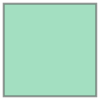

In [993]:
Polygon(get_corners(bb_2)[0])

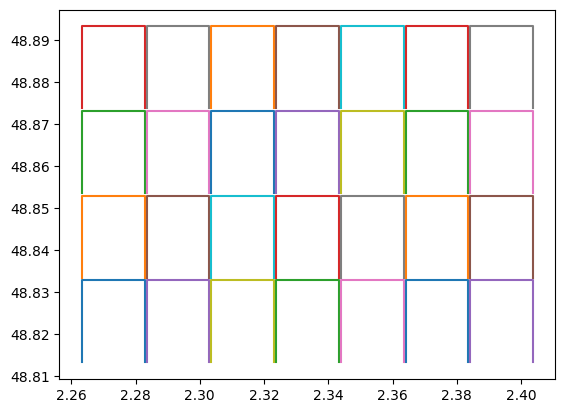

In [681]:
for i in range(28):
    plt.plot(np.array(get_corners([import_bb_array("Paris")[i]]))[0][:,0], np.array(get_corners([import_bb_array("Paris")[i]]))[0][:,1])


In [995]:
import_data_array("Paris").shape

(28, 32, 32, 2)

In [999]:
len([np.mean(tile) for tile in import_data_array("Paris")[:,:,:,0]])

28

In [1001]:
def get_average_temperature_per_tile(city: str) -> np.array: 
    """
    returns average temperature difference to mean temp 
    per tile for given city
    """
    import_data = import_data_array(city)
    
    return np.array([np.mean(tile) for tile in import_data[:,:,:,0]])

In [1004]:
get_average_temperature_per_tile("Paris")

array([-1.82171291,  2.42764359,  3.46422496,  0.92027982, -2.66403637,
       -0.92786497,  2.91701828,  1.76992845, -3.2228638 , -1.51659552,
        2.52514248,  2.59373622, -3.60061894, -4.67608688,  1.74975243,
        1.98203775, -3.78505153, -2.74821663,  0.21420562, -1.85186849,
       -0.58339206,  0.83041611,  0.95658773, -4.35679049,  0.24555263,
        1.043951  ,  0.80362015, -0.71446595])

<AxesSubplot: >

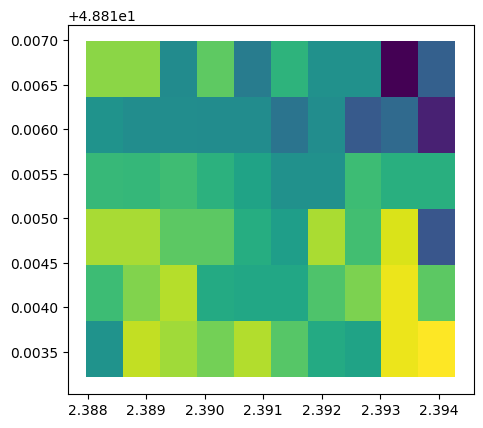

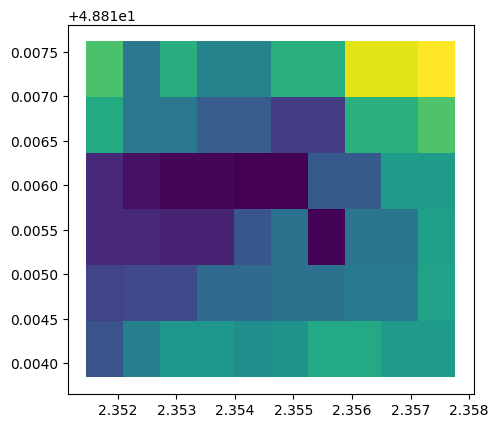

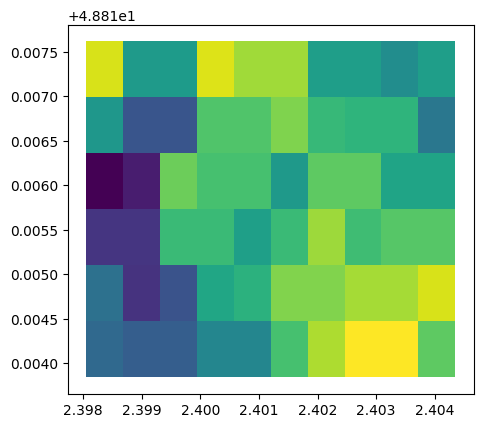

In [13]:
subtiles[random.randint(0,583)].plot(column = 'LST_diff')
subtiles[random.randint(0,583)].plot(column = 'LST_diff')
subtiles[random.randint(0,583)].plot(column = 'LST_diff')

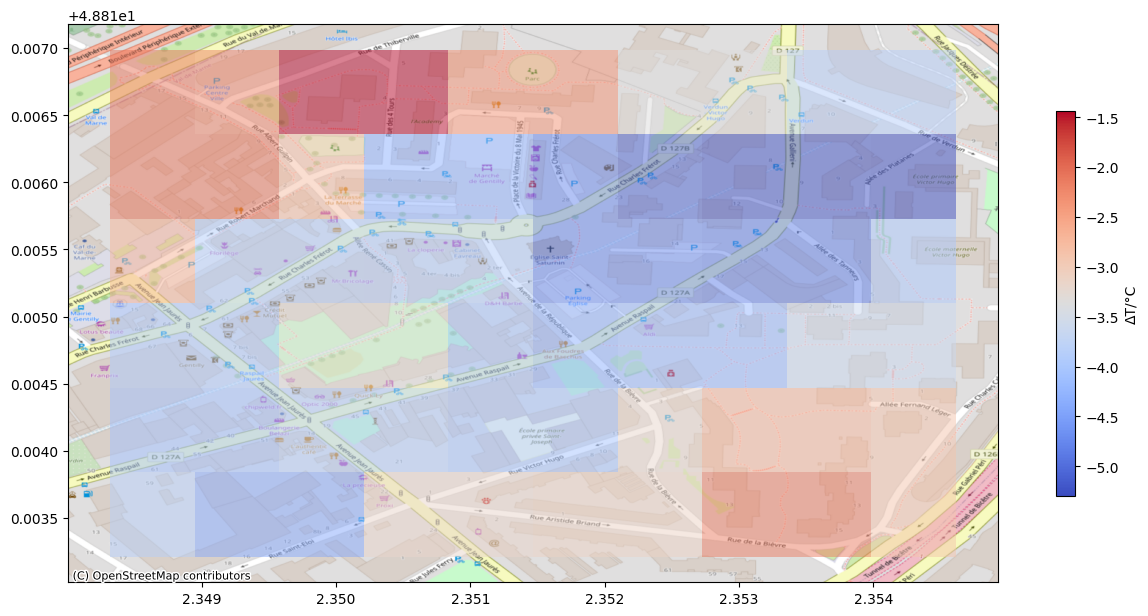

In [25]:
fig, ax = plt.subplots(figsize = (15,10))
subtiles[random.randint(0,583)].plot(column = 'LST_diff', ax = ax, alpha = .5, cmap = 'coolwarm',\
    legend = True,legend_kwds={'shrink': 0.5, 'label': 'ΔT/°C'})
ctx.add_basemap(ax,  crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

In [800]:
import_data_array("Paris")[0,0,0]

array([ -2.315979, -28.184334])

## Export numpy array with all tiles

In [396]:
df_Paris_import.drop(columns=['LST', 'ele','ll_corner', 'ur_corner', 'bb'])

,LST_diff,ele_diff,ul_corner,lr_corner
0,-2.315979,-28.184334,"[[2.2633263464873545, 48.81321032181281]]","[[2.2639559127237074, 48.813839888049166]]"
1,-2.255981,-28.184212,"[[2.2639559127237074, 48.81321032181281]]","[[2.2645854789600603, 48.813839888049166]]"
2,-2.355957,-26.814503,"[[2.2645854789600603, 48.81321032181281]]","[[2.2652150451964133, 48.813839888049166]]"
3,-1.575958,-25.349964,"[[2.2652150451964133, 48.81321032181281]]","[[2.265844611432766, 48.813839888049166]]"
4,-2.915985,-25.118069,"[[2.265844611432766, 48.81321032181281]]","[[2.266474177669119, 48.813839888049166]]"
...,...,...,...,...
35023,3.344025,-6.159432,"[[2.4188292068665307, 48.90009046242952]]","[[2.4194587731028836, 48.90072002866587]]"
35024,2.944031,-5.179237,"[[2.4194587731028836, 48.90009046242952]]","[[2.4200883393392365, 48.90072002866587]]"
35025,2.944031,-5.179237,"[[2.4200883393392365, 48.90009046242952]]","[[2.4207179055755894, 48.90072002866587]]"
35026,1.884033,-2.985519,"[[2.4207179055755894, 48.90009046242952]]","[[2.4213474718119423, 48.90072002866587]]"


In [86]:
def export_array_subslices(data: pd.DataFrame, number_divisions: int, city: str) -> np.array:
    """
    returns and exports one array containing sub-arrays of all sub-tiles
    """
    
    # drop irrelavant features
    data.drop(columns=['LST', 'ele','ll_corner','lr_corner', 'ur_corner', 'bb'])
    
    # slice coords
    slice_coords = slice_picture_coords(CITY_BOUNDING_BOXES[city], number_divisions)
    
    # get all tiles
    all_tiles = [get_sub_tile(gdf_Paris_import, slice_coords, i) for i in range(50)]
    
    # [print(all_tiles.index(tile), len(tile)) for tile in all_tiles if len(tile) > 50]
    
    return all_tiles

In [87]:
subtiles = export_array_subslices(gdf_Paris_import, 25, "Paris")

In [88]:
pd.DataFrame([len(tile) for tile in subtiles]).value_counts()

40    25
50    25
dtype: int64

In [91]:
(40*25+50*25)/50

45.0

<AxesSubplot: >

<Figure size 1200x700 with 0 Axes>

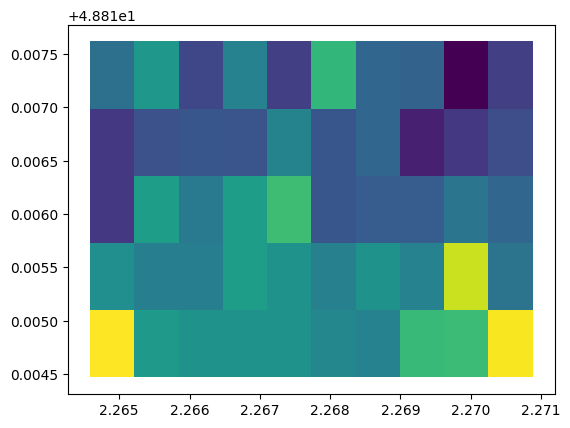

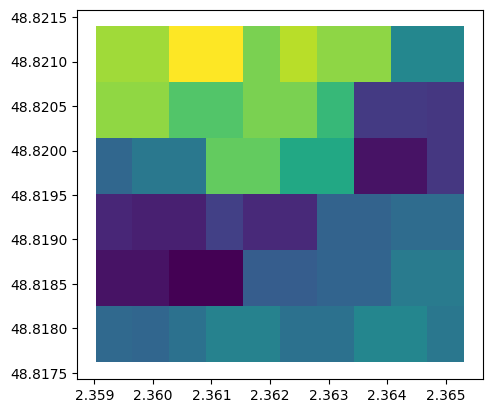

In [ ]:
plt.figure(figsize = (12,7))
subtiles[0].plot(column = 'LST_diff')
subtiles[40].plot(column = 'LST_diff')

## Slicing with overlap

In [30]:
# overlap of 20 percent of small tiles
slice_coords = get_all_sub_coords(df_Paris_import, 10,6, 20)
len(slice_coords)

583

In [51]:
np.array(get_corners([slice_coords[1]]))[0,:,0]

array([2.26269678, 2.26269678, 2.26899244, 2.26899244])

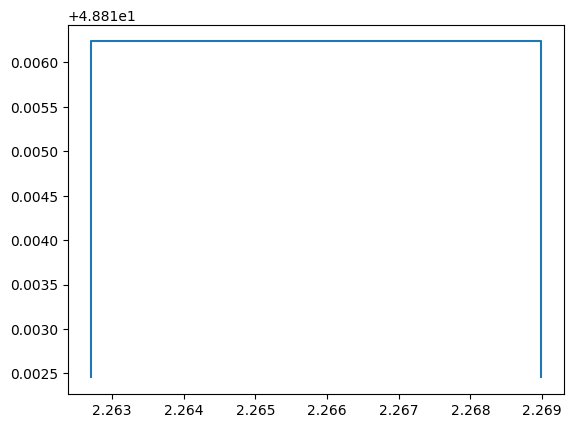

In [53]:
plt.plot(np.array(get_corners([slice_coords[1]]))[0,:,0], np.array(get_corners([slice_coords[1]]))[0,:,1])

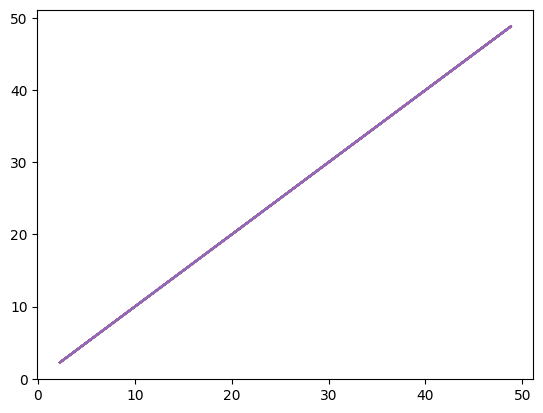

In [35]:
max_tiles = 5
corner_coords = [get_corners([slice_coords[i]]) for i in range(max_tiles)]

x_coords = [np.array(corner_coords)[i,:,0] for i in range(max_tiles)]
y_coords = [np.array(corner_coords)[i,:,1] for i in range(max_tiles)]

for i in range(max_tiles):
    plt.plot(np.append(x_coords[i],x_coords[i][0]),  np.append(y_coords[i],y_coords[i][0]))
